# Computational Optimal Transport

## はじめに



## Sinkhornの更新式
$u^{(l+1)} \equiv \frac{a}{Kv}$, $v^{(l+1)} \equiv \frac{b}{K^\top u}$

In [1]:
import numpy as np
import pylab as plt

In [2]:
from scipy.stats import norm


t = np.arange(0, 1, 0.01)
mean = 0.3
std = 0.1

a = norm.pdf(t, mean, np.abs(std))


t = np.arange(0, 1, 0.02)

mean1 = 0.2
std1 = 0.05

mean2 = 0.7
std2 = 0.1

b = 0.4 * norm.pdf(t, mean1, np.abs(std1)) + 0.6 * norm.pdf(t, mean2, np.abs(std2))

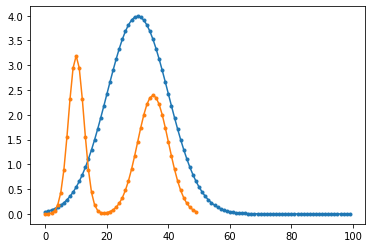

In [3]:
plt.plot(a, marker=".")
plt.plot(b, marker=".")

plt.show()

$u^{(l+1)} \equiv \frac{a}{Kv}$, $v^{(l+1)} \equiv \frac{b}{K^\top u}$

$f = \epsilon \log a - \epsilon \log K e^{g^{(l)}/\epsilon}$

$g = \epsilon \log b - \epsilon \log K^\top e^{g^{(l)}/\epsilon}$

In [4]:
C = (np.expand_dims(a, 0) - np.expand_dims(b, 1))**2

In [126]:
n = a.shape[0]
m = b.shape[0]

epsilon =  10

K = np.exp(-C/epsilon).transpose()

In [127]:
from scipy.misc import logsumexp

In [128]:
import torch
import torch.nn

In [129]:
from sklearn.utils.extmath import logsumexp

In [130]:
def min_epsilon(z, epsilon):
    z_ = np.min(z, axis=0)
    return z_ - epsilon * np.log(np.sum(np.exp(-z + z_ )/epsilon, axis=0))

In [131]:
f = np.ones(n)
g = np.zeros(m)

In [132]:
for i in range(20):
    S = C - np.expand_dims(f,0) - np.expand_dims(g, 1)
    f = min_epsilon(S, epsilon=epsilon) + f + epsilon * np.log(a)
    S = C - np.expand_dims(f,0) - np.expand_dims(g, 1)
    g = min_epsilon(S.transpose(), epsilon=epsilon) + g + epsilon * np.log(b)

In [133]:
f

array([250.79662538, 253.70690696, 256.50415339, 259.18438691,
       261.74244338, 264.17162071, 266.46324182, 268.60612825,
       270.71309179, 272.69646601, 274.60385861, 276.35248185,
       277.89264718, 279.94072822, 282.62256668, 285.13806896,
       288.29848674, 291.27354223, 293.99358672, 296.43742605,
       298.6096008 , 300.53389581, 302.24160808, 303.76017449,
       305.10601623, 306.28239592, 307.28111379, 308.08638163,
       308.67949421, 309.04332981, 309.166019  , 309.04332981,
       308.67949421, 308.08638163, 307.28111379, 306.28239592,
       305.10601623, 303.76017449, 302.24160808, 300.53389581,
       298.6096008 , 296.43742605, 293.99358672, 291.27354223,
       288.29848674, 285.13806896, 282.62256668, 279.94072822,
       277.89264718, 276.35248185, 274.60385861, 272.69646601,
       270.71309179, 268.60612825, 266.46324182, 264.17162071,
       261.74244338, 259.18438691, 256.50415339, 253.70690696,
       250.79662538, 247.7763754 , 244.64852437, 241.41

In [134]:
g

array([-366.25655679, -351.0978764 , -337.64985505, -325.97235887,
       -316.47685945, -309.49169047, -303.76670864, -298.22815518,
       -294.64632928, -292.3598321 , -291.49213765, -292.35975965,
       -294.64609775, -298.22726869, -303.76265434, -309.47806787,
       -316.39388388, -325.43610301, -334.4267879 , -337.58437555,
       -333.99350606, -328.69183244, -323.58175859, -318.99357855,
       -315.03238835, -311.73234702, -308.83012122, -306.30592646,
       -303.64078653, -300.98354688, -298.85794633, -297.20534359,
       -295.95834986, -295.07242603, -294.53549059, -294.35465389,
       -294.53549059, -295.07242603, -295.95834986, -297.20534359,
       -298.85794633, -300.98354688, -303.64078653, -306.30592646,
       -308.83012128, -311.73234825, -315.03240744, -318.99386387,
       -323.5854069 , -328.73229638])

In [135]:
# for i in range(20):    
#     g = epsilon * np.log(b) - epsilon * np.log(K.transpose() @ np.exp(f))
#     f = epsilon * np.log(a) - epsilon * np.log(K @ np.exp(g))

In [136]:
P = np.diag(np.exp(f/epsilon)) @ K @ np.diag(np.exp(g/epsilon))

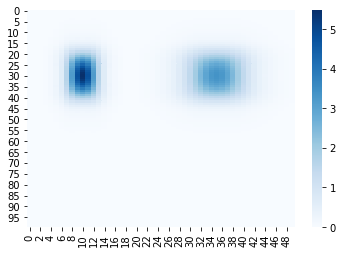

In [137]:
import seaborn as sns

sns.heatmap(P, cmap="Blues")
plt.show()

In [138]:
P

array([[9.67292147e-06, 4.40458016e-05, 1.69038053e-04, ...,
        1.09113731e-03, 6.89863793e-04, 4.12378844e-04],
       [1.29384549e-05, 5.89161454e-05, 2.26116897e-04, ...,
        1.46009201e-03, 9.22984356e-04, 5.51673915e-04],
       [1.71099559e-05, 7.79125320e-05, 2.99040618e-04, ...,
        1.93185250e-03, 1.22095016e-03, 7.29672652e-04],
       ...,
       [1.57399321e-13, 7.16696013e-13, 2.75017530e-12, ...,
        1.77341950e-11, 1.12175740e-11, 6.70753381e-12],
       [8.01408750e-14, 3.64910377e-13, 1.40026941e-12, ...,
        9.02947924e-12, 5.71149984e-12, 3.41518391e-12],
       [4.03982321e-14, 1.83947756e-13, 7.05862129e-13, ...,
        4.55167226e-12, 2.87911127e-12, 1.72156084e-12]])

4.43の式 マイナスfじゃなくてプラスf